In [337]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Gathering Data

## a- Loading Data

In [338]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NTI-DataAnalysis/capstone_prj/supermarket-sales.csv')

## b- Data Preview

In [339]:
df.head()

,Invoice ID,Branch,Yangon,Naypyitaw,Mandalay,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,750-67-8428,A,1,0,0,Normal,Male,Health and beauty,74.69,7,26.1415,NaN,01/05/2019,13:08,Ewallet,9.1
1,226-31-3081,C,0,1,0,Normal,Male,Electronic accessories,15.28,5,3.8200,80.2200,03/08/2019,10:29,Cash,9.6
2,631-41-3108,A,1,0,0,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03/03/2019,13:23,Credit card,7.4
3,123-19-1176,A,1,0,0,Normal,Male,Health and beauty,58.22,8,NaN,489.0480,1/27/2019,8 - 30 PM,Ewallet,8.4
4,373-73-7910,A,1,0,0,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02/08/2019,10:37,Ewallet,5.3


In [340]:
df.tail()

,Invoice ID,Branch,Yangon,Naypyitaw,Mandalay,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
1001,861-77-0145,C,0,1,0,Member,Male,Electronic accessories,81.97,10,40.9850,860.6850,03/03/2019,14:30,Cash,9.2
1002,479-26-8945,B,0,0,1,Member,Female,Sports and travel,16.49,2,1.6490,34.6290,02/05/2019,11:32,Ewallet,4.6
1003,210-67-5886,C,0,1,0,Member,Female,Health and beauty,98.21,3,14.7315,309.3615,02/05/2019,10:41,Credit card,7.8
1004,227-78-1148,B,0,0,1,Normal,Female,Fashion accessories,72.84,7,25.4940,535.3740,2/15/2019,12:44,Cash,8.4
1005,645-44-1170,A,1,0,0,Member,Male,Home and lifestyle,58.07,9,26.1315,548.7615,1/19/2019,20:07,Ewallet,4.3


# Inspect Data

In [341]:
df.shape

(1006, 16)

In [342]:
df.describe()

,Yangon,Naypyitaw,Mandalay,Quantity,Tax 5%,Total,Rating
count,1006.000000,1006.000000,1006.000000,1006.000000,997.000000,1003.000000,1006.000000
mean,0.338966,0.329026,0.332008,5.469185,15.479682,322.734689,7.056163
std,0.473594,0.470093,0.471168,3.014153,11.728320,245.865964,3.318751
min,0.000000,0.000000,0.000000,-8.000000,0.508500,10.678500,4.000000
25%,0.000000,0.000000,0.000000,3.000000,5.986500,123.789750,5.500000
50%,0.000000,0.000000,0.000000,5.000000,12.227500,254.016000,7.000000
75%,1.000000,1.000000,1.000000,8.000000,22.720500,471.009000,8.500000
max,1.000000,1.000000,1.000000,10.000000,49.650000,1042.650000,97.000000


In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1006 non-null   object 
 1   Branch         1006 non-null   object 
 2   Yangon         1006 non-null   int64  
 3   Naypyitaw      1006 non-null   int64  
 4   Mandalay       1006 non-null   int64  
 5   Customer type  1006 non-null   object 
 6   Gender         1006 non-null   object 
 7   Product line   1006 non-null   object 
 8   Unit price     1006 non-null   object 
 9   Quantity       1006 non-null   int64  
 10  Tax 5%         997 non-null    float64
 11  Total          1003 non-null   float64
 12  Date           1006 non-null   object 
 13  Time           1006 non-null   object 
 14  Payment        1006 non-null   object 
 15  Rating         1006 non-null   float64
dtypes: float64(3), int64(4), object(9)
memory usage: 125.9+ KB


In [344]:
# Check Data

print(df['Branch'].unique())

print(df['Customer type'].unique())

print(df['Gender'].unique())

# print(df['Date'].unique())

# print(df['Time'].unique())

print(df['Payment'].unique())

print(df['Product line'].unique())


['A' 'C' 'B']
['Normal' '-' 'Member' 'Memberr']
['Male' 'Female']
['Ewallet' 'Cash' 'Credit card']
['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']


- Quality Issue:
    - Inconsistant Value: **Quantity, Date** and **Time** columns
    - Inconsistant DataType: **Invoice ID, Unit Price, Date** and **Time** columns
    - Missing Values: **Customer Type, Tax** and **Total** columns
- Tidy Issue: variables forms columns

# Data Backup

In [345]:
# take a backup of my original DataFarme
df_backup = df.copy()

# Quality Issue
- i- Inconsistant Values
- ii- Inconsistant DataTypes
- iii- Missing Values
- iv- Dublicated Rows


## i- Inconsistant DataType

### i-a Define
- **Inovoice ID** Column convert to int
- **Unit Price** Column convert to float datatype
- **Data** Column convert to Date datatype
- **Time** Column convert to Time datatype

### i-b Code

In [346]:
#convert Invoice ID Column to int
df['Invoice ID'] = df['Invoice ID'].str.replace('-', '').astype(int)

In [347]:
# Step 1: Remove non-numeric characters from 'Unit price' (e.g., remove 'USD')
df['Unit price'] = df['Unit price'].str.extract('(\d+\.?\d*)')

# Step 2: Convert 'Unit price' to float first, then to integer (since Unit price may contain decimal points)
df['Unit price'] = pd.to_numeric(df['Unit price'], errors='coerce').astype(float)

In [348]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

### i-c Test

In [349]:
df.dtypes

,0
Invoice ID,int64
Branch,object
Yangon,int64
Naypyitaw,int64
Mandalay,int64
Customer type,object
Gender,object
Product line,object
Unit price,float64
Quantity,int64


## ii- Inconsistant Values

### ii-a Define
- 1- "Memberr" to be "Member" in **Customer type** column
- 2- **Quantity** column has -ve values
- 3- **Time** column has Inconsistant Value 3rd row

### ii-b code

In [350]:
# Replace 'Memberr' with 'Member' in the 'Customer type' column
df['Customer type'] = df['Customer type'].replace('Memberr', 'Member')

In [351]:
#find -ve Quantity Column values
# n_quantity_val = df[df['Quantity'] <= 0]

# Convert negative values in 'Quantity' to positive
df['Quantity'] = df['Quantity'].abs()

In [352]:
df['Time'].loc[3] = '20:30'

<ipython-input-352-149ac33a0206>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time'].loc[3] = '20:30'


### i-c Test

In [353]:
print(df['Customer type'].unique())

['Normal' '-' 'Member']


In [354]:
df[df['Quantity'] <= 0]

,Invoice ID,Branch,Yangon,Naypyitaw,Mandalay,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating


In [355]:
df['Time'].loc[3]

'20:30'

## iii- Missing Values
`Total = (Unit price * Quantity) + [(Unit price *Quantity) * 5%]`

### iii-a Define
- calculated column **Tax 5%** has nulls
- calculated column **Total** has nulls
- **Customer Type** column has ( - ) instead of nulls

### iii-b Code

In [356]:
# Calculate Tax 5% column
# Tax 5% = Unit price * Quantity * 5%
df['Tax 5%'] = df['Unit price'] * df['Quantity'] * 0.05

In [357]:
# Calculate Total column
# Total = Unit price * Quantity + Tax 5%
df['Total'] = (df['Unit price'] * df['Quantity']) + df['Tax 5%']

In [358]:
# Find the mode of the 'customer type' column
mode_value = df['Customer type'].mode()[0]

# Replace '-' with the mode value
df['Customer type'] = df['Customer type'].replace('-', mode_value)

### iii-c Test

In [359]:
#check Tax 5% column nulls
df['Tax 5%'].isna().sum()

0

In [360]:
#check Total column nulls
df['Total'].isna().sum()

0

In [361]:
#check Customer type column nulls
df[df['Customer type'] == '-'].shape[0]

0

## iv- Dublicated Rows

### iv-a Define
- there are 6 dublicated rows

In [362]:
df.duplicated().sum()

6

### iv-b Code

In [363]:
#delete dublicated rows
df.drop_duplicates(inplace=True)

### iv-c Test

In [364]:
df.duplicated().sum()

0

# Tidiness Issues
- i- Variable forms a Column


### i-a Define
- **Yangon, Naypyitaw** and **Mandalay** columns are Values for the name of the City

### i-b Code

In [365]:
# use Branch Column as Indecator for name of the City
# Create a mapping for Branch values
branch_mapping = {
    'A': 'Yangon',
    'B': 'Mandalay',
    'C': 'Naypyitaw'
}

# Add the new 'City' column
df['City'] = df['Branch'].map(branch_mapping)


In [366]:
# Drop the 'Yangon', 'Mandalay', and 'Naypyitaw' columns
df = df.drop(columns=['Yangon', 'Mandalay', 'Naypyitaw'])

### i-c Test

In [367]:
df

,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating,City
0,750678428,A,Normal,Male,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,9.1,Yangon
1,226313081,C,Normal,Male,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,9.6,Naypyitaw
2,631413108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,7.4,Yangon
3,123191176,A,Normal,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:30,Ewallet,8.4,Yangon
4,373737910,A,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,5.3,Yangon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233675758,C,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,6.2,Naypyitaw
996,303962227,B,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Ewallet,4.4,Mandalay
997,727021313,A,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,7.7,Yangon
998,347562442,A,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,4.1,Yangon


# Export as CSV file

In [368]:
# Export the cleaned DataFrame to a CSV file
df.to_csv('cleaned_supermarket_data.csv', index=False)

# Visualizations
- i- Sales Distribution by City
- ii- Customer Type Distribution
- iii- Average Purchase Amount by Gender
- iv- Sales Trend Over Time
- v- Sales Performance by Branch
- vi- Visualizing Average Rating by Branch
- vii- Product Line Preferences
- viii- Payment Method Distribution

## i- Sales Distribution by City


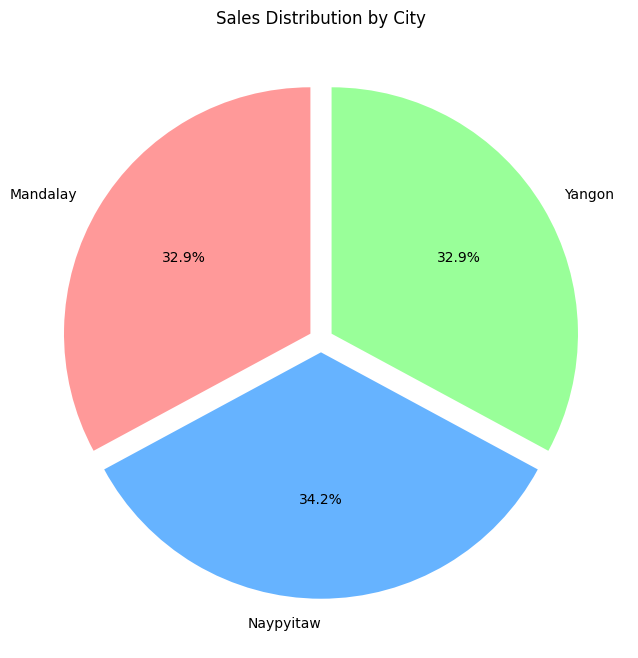

In [369]:
# Group by City and sum the total sales
city_sales = df.groupby('City')['Total'].sum()

# Plot a pie chart for sales by city
plt.figure(figsize=(8, 8))
city_sales.plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'], startangle=90, explode=(0.05, 0.05, 0.05))
plt.title('Sales Distribution by City')
plt.ylabel('')  # Hide y-label for a cleaner look
plt.show()

## ii- Customer Type Distribution

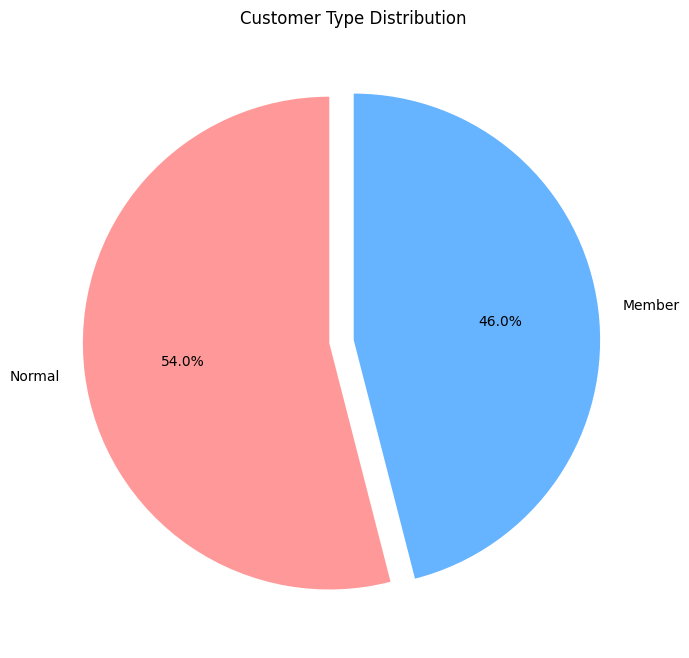

In [370]:
# Count the number of customers in each category
customer_type_counts = df['Customer type'].value_counts()

# Plot a pie chart for customer type distribution
plt.figure(figsize=(8, 8))
customer_type_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90, explode=(0.1, 0))
plt.title('Customer Type Distribution')
plt.ylabel('')
plt.show()

## iii- Average Purchase Amount by Gender



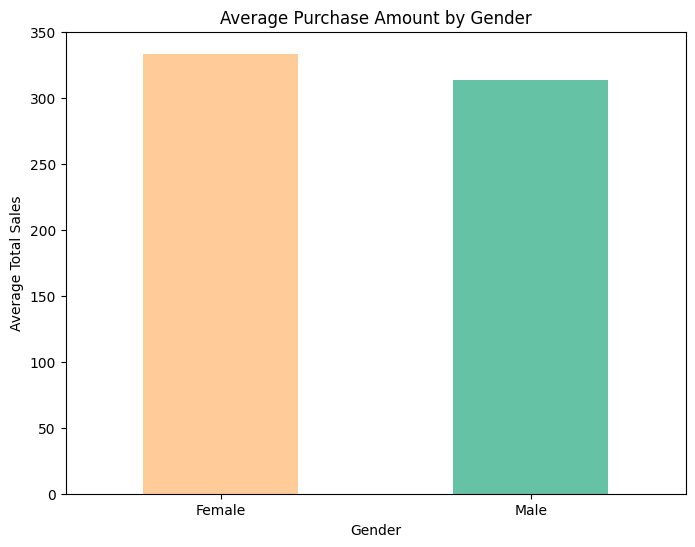

In [371]:
# Group by Gender and calculate the mean Total sales
gender_sales = df.groupby('Gender')['Total'].mean()

# Plot a bar chart for average purchase amount by gender
plt.figure(figsize=(8, 6))
gender_sales.plot(kind='bar', color=['#ffcc99', '#66c2a5'])
plt.title('Average Purchase Amount by Gender')
plt.ylabel('Average Total Sales')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.show()

## iv- Sales Trend Over Time

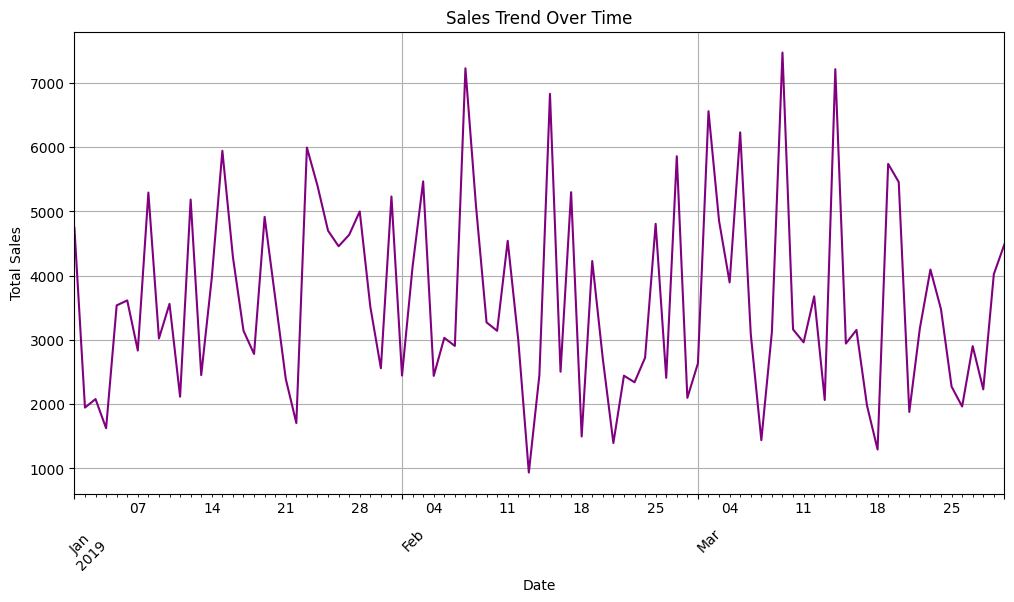

In [372]:
# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Group by Date and sum the total sales
daily_sales = df.groupby('Date')['Total'].sum()

# Plot a line chart for sales trends over time
plt.figure(figsize=(12, 6))
daily_sales.plot(kind='line', color='purple')
plt.title('Sales Trend Over Time')
plt.ylabel('Total Sales')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## vi- Sales Performance by Branch

<ipython-input-373-4877f84d800f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_branch.index, y=sales_by_branch.values, palette='viridis')


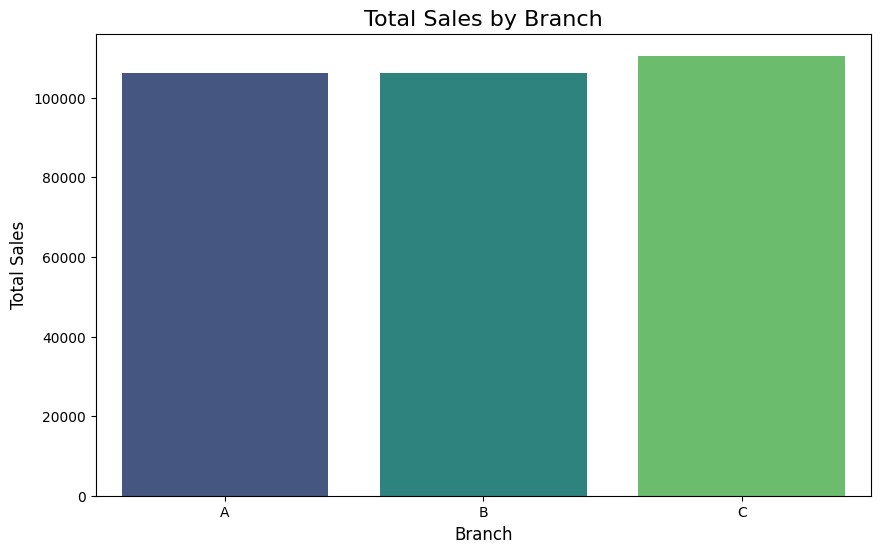

In [373]:
sales_by_branch = df.groupby('Branch')['Total'].sum()

# Plotting Sales Performance by Branch
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_branch.index, y=sales_by_branch.values, palette='viridis')
plt.title('Total Sales by Branch', fontsize=16)
plt.xlabel('Branch', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.show()

## vii- Visualizing Average Rating by Branch

<ipython-input-374-bbba7ba84b7a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=rating_by_branch.index, y=rating_by_branch.values, palette='coolwarm')


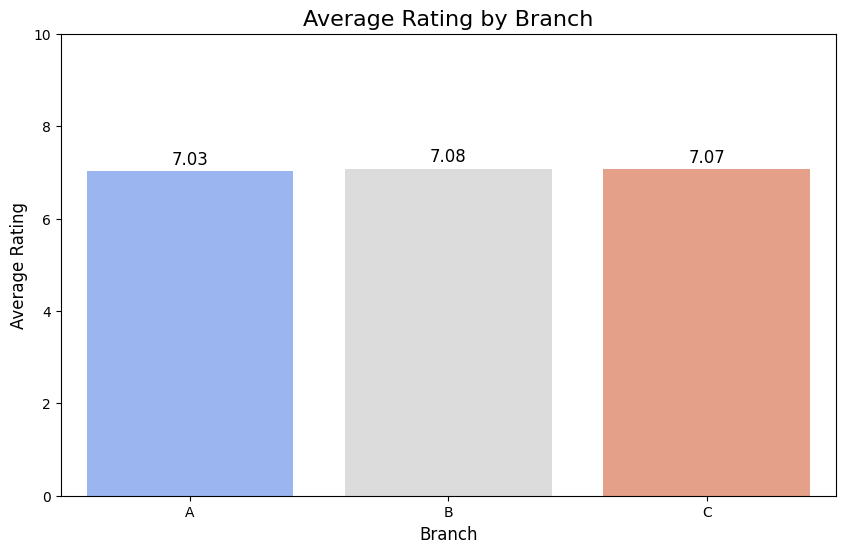

In [374]:
rating_by_branch = df.groupby('Branch')['Rating'].mean()

# Plotting Average Rating by Branch
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=rating_by_branch.index, y=rating_by_branch.values, palette='coolwarm')

# Add labels on top of each bar to show the exact average rating
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Average Rating by Branch', fontsize=16)
plt.xlabel('Branch', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.ylim(0, 10)  # Rating range is from 0 to 10
plt.show()

## viii- Product Line Preferences

<ipython-input-375-8e7e44a327e5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_line_sales.values, y=product_line_sales.index, palette='coolwarm')


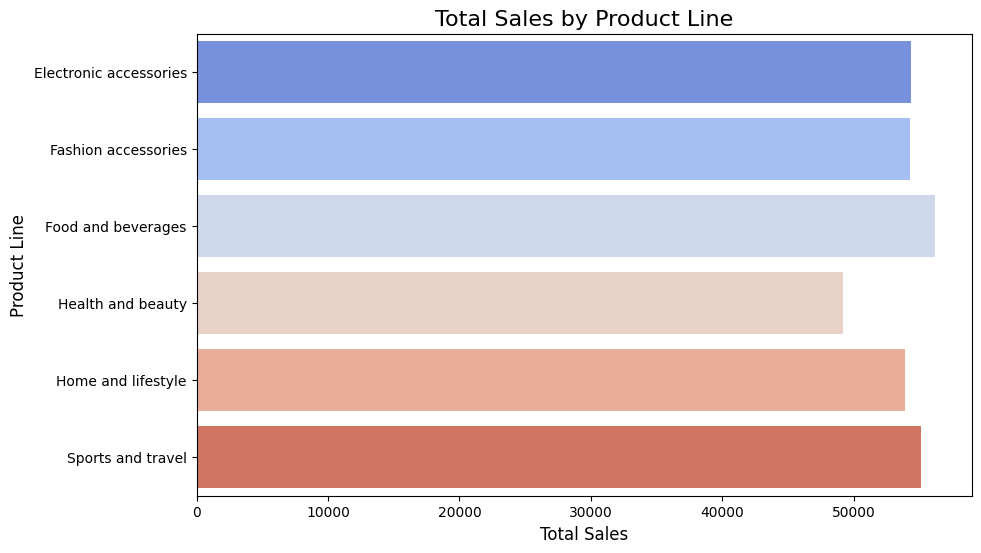

In [375]:
product_line_sales = df.groupby('Product line')['Total'].sum()

# Plotting Product Line Preferences
plt.figure(figsize=(10, 6))
sns.barplot(x=product_line_sales.values, y=product_line_sales.index, palette='coolwarm')
plt.title('Total Sales by Product Line', fontsize=16)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Product Line', fontsize=12)
plt.show()

## ix- Payment Method Distribution

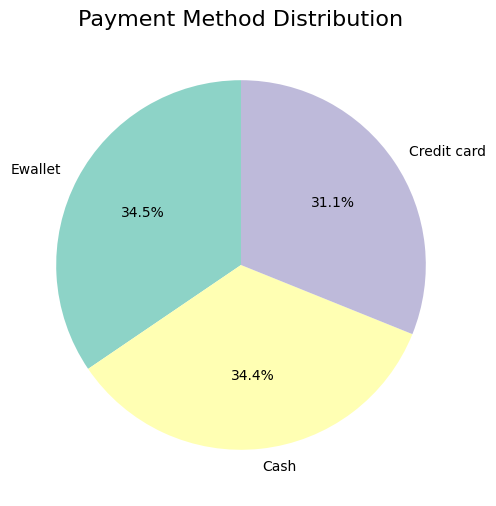

In [376]:
payment_method_dist = df['Payment'].value_counts()

# Plotting Payment Method Distribution
plt.figure(figsize=(10, 6))
payment_method_dist.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))
plt.title('Payment Method Distribution', fontsize=16)
plt.ylabel('')  # Remove the y-label for the pie chart
plt.show()